# AE 771 | Homework \#11 | Rocket Propulsion | Ray Taghavi
### Code Written by Henry Hunt

In [86]:
#Importing Libraries
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sympy import Symbol
import time
import math

#Graph Formatting
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 14
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

#Graph Font Edit
font = {'family':'Times New Roman',
        'weight' : 'bold',
        'size'   : 22}
matplotlib.rc('font', **font)

## Question 1

A. Plot of Figure 4.6 AKA 5.4


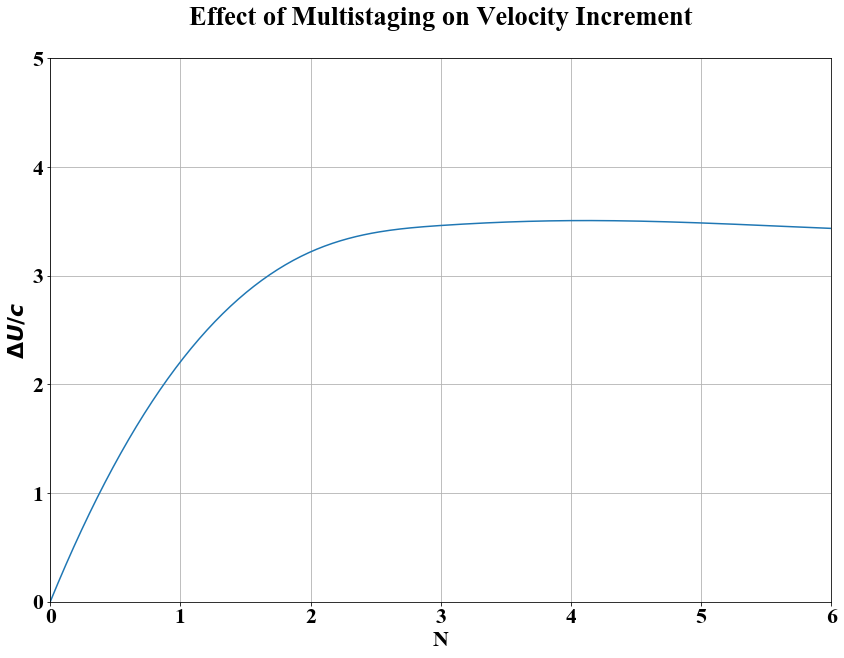

B_1. For a Altitude of 200 miles:
	Orbital Velocity: 10.9 km/s or 35777.49 ft/s
	Escape Velocity: 7.71 km/s or 25298.51 ft/s
B_2. For a Altitude of 2150 miles:
	Orbital Velocity: 9.0 km/s or 29525.87 ft/s
	Escape Velocity: 6.36 km/s or 20877.95 ft/s

C. The Orbit Altitude for Geostationary Satellites is 22199.33 miles or 35718.72 km


In [110]:
#Part A | Reproduce Figure 4.6 AKA 5.4
print('A. Plot of Figure 4.6 AKA 5.4')

n = np.linspace(0.0001,6,7)
s1 = 0.1  #Structural Fraction
lo = 0.01 #Payload Fraction Overall
Δu_c = n*np.log(1/((s1+lo**(1/n))))
from scipy.interpolate import make_interp_spline, BSpline
xnew = np.linspace(n.min(), n.max(), 300) 
spl = make_interp_spline(n, Δu_c, k=3)  # type: BSpline
power_smooth = spl(xnew)
plt.ylim(0,5)
plt.xlim(0,6)
plt.grid()
plt.xlabel('N')
plt.ylabel('$ΔU/c$')
plt.title('Effect of Multistaging on Velocity Increment\n')
plt.plot(xnew, power_smooth)
plt.show()


#Part B | Calculate the orbital velocity and escape velocity at the distances above Earth
R = 6378.1           #Radius of Earth | km
d1 = 200             #Distance above Earth 1 | miles
d2 = 2150            #Distance above Earth 2 | miles
Rm1 = d1* 1.609      #Statute miles to km
Rm2 = d2* 1.609      #Statute miles to km
G = 6.67 * 10**(-11) #Gravitational Constant | m^3*kg^-1*s^-2
M = 5.972*10**24     #Mass of the Earth | kg
ve1 = np.sqrt(2*G*M/((R+Rm1)*1000))/1000
ve2 = np.sqrt(2*G*M/((R+Rm2)*1000))/1000
vo1 = np.sqrt(G*M/((R+Rm1)*1000))/1000
vo2 = np.sqrt(G*M/((R+Rm2)*1000))/1000
print('B_1. For a Altitude of 200 miles:')
print('\tOrbital Velocity:',round(ve1,2),'km/s or',round(ve1*3281,2),'ft/s')
print('\tEscape Velocity:',round(vo1,2),'km/s or',round(vo1*3281,2),'ft/s')
print('B_2. For a Altitude of 2150 miles:')
print('\tOrbital Velocity:',round(ve2,2),'km/s or',round(ve2*3281,2),'ft/s')
print('\tEscape Velocity:',round(vo2,2),'km/s or',round(vo2*3281,2),'ft/s\n')

#Part C | Calculate the orbit altitude for geostationary and geo-synchronous satellites
re = 4000 #Mean Radius of the Earth | miles
T =  86164.09054 #Orbital Period | One Siderial Day | Sec
r = ((G*M*T**2)/(4*np.pi**2))**(1/3)
r = r/1609 #Radius of Orbit | miles
alt = r-re
print('C. The Orbit Altitude for Geostationary Satellites is',round(alt,2),'miles or',round(alt*1.609,2),'km')



## Question 2

In [55]:
#Part A | Determine velocity increment achievable for single stage system
mi = 25000 #Initial mass | lbm
ms = 2000  #Structural mass | lbm
mp = 500   #Payload mass | lbm
Isp = 300  #Specific impulse | sec

#Calculation Process
s = ms/mi                  #Structural Fraction
l = mp/mi                  #Payload Fraction
go = 32.2                  #Gravitational Constant | ft/s^2
Δu = Isp*go*np.log(1/(s+l))#Velocity increment | ft/s
print('A. The Achievable Velocity Increment is',round(Δu,2),'ft/s or',round(Δu/3281,2),'km/s')

#Part B | If the vehicle reaches an altitude of 200 miles can it obtain orbital velocity?
print('B. It can not enter orbit. The ΔV available is',round(Δu/3281,2),'km/s and it needs',round(ve1,2),'km/s.')

A. The Achievable Velocity Increment is 22242.97 ft/s or 6.78 km/s
B. It can not enter orbit. The ΔV available is 6.78 km/s and it needs 10.9 km/s.


## Question 3

In [117]:
# Two Stage booster at Kennedy Space Center
vdes = 10000 #Design Velocity of Booster | m/s
ms2 = 12000  #Mass of the second stage including structure and propellant | kg
ms2p = 9000  #Mass of just the stage 2 propellant | kg
mp2 = 2000   #Mass of the stage 2 payload | kg
Isp1 = 350   #Isp of the first stage | sec
Isp2 = 400   #Isp of the second stage |sec
go = 9.81    #Gravity | m/sec^2
ms1 = 8000   #Mass of stage 1 structural components | kg
#What mass of propellant must be loaded on the first stage to achieve the required design velocity?
l2 =  mp/(ms2+mp2)#Payload Fraction
s2 = (ms2-ms2p)/(ms2+mp2) #Structural Fraction
Δu2 = Isp2*go*np.log(1/(s2+l2)) #Change in Velocity of Stage 2 | m/s
Δust = vdes - Δu2               #Desired Change in Velocity of Stage 1 | m/s
mp1 = ms2 + mp2                 #Mass of the stage 1 payload | kg
mso = ms1                       #Overall Guess Mass of the stage | kg
Δu1 = 0                         #Initial Guess for Velocity of Stage 1 | m/s
ms1p = 0                        #Initial Guess for Stage 1 Propellant | kg

while Δu1 < Δust:
    Δu1 = Isp1*go*np.log(1/((ms1/mso)+(mp1/mso))) #Change in Velocity of Stage 1
    ms1p = ms1p + 0.1      #Mass of stage 1 propellant
    mso = ms1p + ms1 + mp1 #Overall Mass
print('The mass of the first stage propellant is',round(ms1p,2),'kg.')

#What is the vehicles total mass at lift-off?
print("The total mass at lift-off of the vehicle is",round(mso,2),"kg.")

The mass of the first stage propellant is 102812.9 kg.
The total mass at lift-off of the vehicle is 124812.9 kg.


## ΔV Calculations

In [102]:
#Single Stage
go=9.81     #Gravitational Constant
Isp=480     #Specific Impulse | sec
Mp=84       #Mass Payload | kg
Ms=250      #Mass Structure | kg
Mpr=1500    #Mass Propellant | kg
Mo=Mp+Ms+Mpr#Initial Mass | kg
s=Ms/Mo     #Structural Fraction
l=Mp/Mo     #Payload Fraction
Δu=Isp*go*np.log(1/(s+l))
print("Single Stage | Velocity Increment:",round(Δu/1000,2),"km/s")

#Multi Stage | 2
n=2
Isp=480     #Specific Impulse stage 1 | sec
Isp2=480    #Specific Impulse stage 2 | sec
Mp1=175     #Mass Payload | kg
Mpr1=750    #Mass Propellant stage 1 | kg
Ms1=250     #Mass Structure stage 1 | kg
Mpr2=750    #Mass Propellant stage 2 | kg
Ms2=250     #Mass Structure stage 2 | kg
Mo1=Mp1+Mpr2+Ms2+Mpr1+Ms1  #Initial Mass
Mo2=Mp1+Mpr2+Ms2           #Initial Mass
s1=Ms1/Mo1   #Structural Fraction
s2=Ms2/Mo2   #Structural Fraction
l1=Mp1/Mo1   #Payload Fraction
l2=Mp1/Mo2   #Payload Fraction
Δu=(Isp*go*np.log(1/(s1+l1)))+(Isp2*go*np.log(1/(s2+l2)))
print("Two Stage | Velocity Increment:",round(Δu/1000,2),"km/s")

Single Stage | Velocity Increment: 8.02 km/s
Two Stage | Velocity Increment: 12.48 km/s
